In [9]:
import opendatasets as od


In [10]:
dataset = 'https://www.kaggle.com/datasets/pavlofesenko/titanic-extended'


In [11]:
od.download(dataset)


Skipping, found downloaded files in ".\titanic-extended" (use force=True to force download)


In [12]:
import os


In [13]:
data_dir = '.\titanic-extended'


In [14]:
os.listdir(data_dir)


OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: '.\titanic-extended'

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('full.csv')

In [ ]:
# get output of columns, see if any are unnecessary
df.columns

In [3]:
# dropping unnecessary columns
df = df[[
#     'PassengerId', 
    'Survived', 
#     'Pclass', 'Name', 
    'Sex', 
#     'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 
     'Name_wiki', 'Age_wiki', 
#     'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'
]].copy()

In [4]:
# renaming columns for uniformity
df = df.rename(columns={
    'Name_wiki' : 'Name',
    'Age_wiki' : 'Age'
}).copy()

In [5]:
# reodering columns
df = df[['Name', 'Survived', 'Class', 'Sex', 'Age']].copy()

In [6]:
#checking for null values
df.isna().sum()

Name          5
Survived    418
Class         5
Sex           0
Age           7
dtype: int64

In [7]:
# dropping null values
df.dropna(inplace=True)

In [8]:
df.head()

,Name,Survived,Class,Sex,Age
0,"Braund, Mr. Owen Harris",0.0,3.0,male,22.0
1,"Cumings, Mrs. Florence Briggs (née Thayer)",1.0,1.0,female,35.0
2,"Heikkinen, Miss Laina",1.0,3.0,female,26.0
3,"Futrelle, Mrs. Lily May (née Peel)",1.0,1.0,female,35.0
4,"Allen, Mr. William Henry",0.0,3.0,male,35.0


In [9]:
# changing columns with numerical values to integers instead of floating points
df.Survived = df.Survived.astype(int)
df.Class = df.Class.astype(int)
df.Age = df.Age.astype(int)

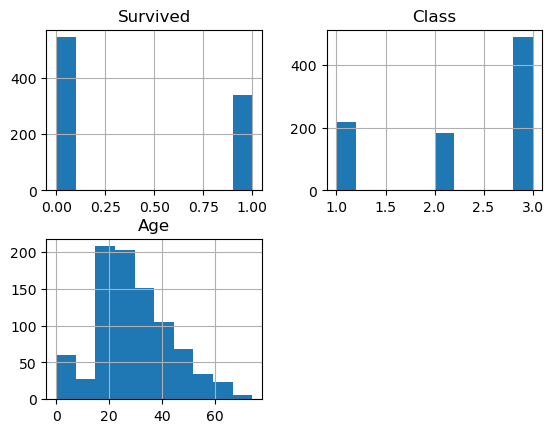

In [33]:
df.hist()
plt.show()

In [11]:
df.dtypes

Name        object
Survived     int32
Class        int32
Sex         object
Age          int32
dtype: object

In [12]:
pd.pivot_table(df, index='Class', columns='Survived', values='Age')

Survived,0,1
Class,,
1,43.450000,35.605839
2,32.656250,26.337209
3,26.210811,21.635593


In [13]:
# df['first_class'] = df['Class'] == 1
# df['second_class'] = df['Class'] == 2
# df['third_class'] = df['Class'] == 3
df.dtypes

Name        object
Survived     int32
Class        int32
Sex         object
Age          int32
dtype: object

In [14]:
df.columns

Index(['Name', 'Survived', 'Class', 'Sex', 'Age'], dtype='object')

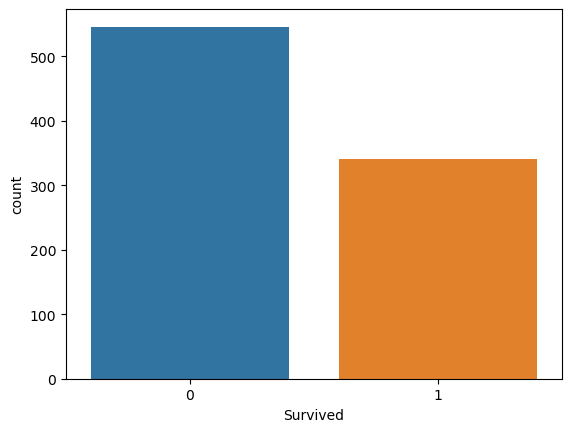

In [32]:
# plt.figure(figsize=(20,8))
sns.countplot(x=df['Survived'], data=df)
plt.show()

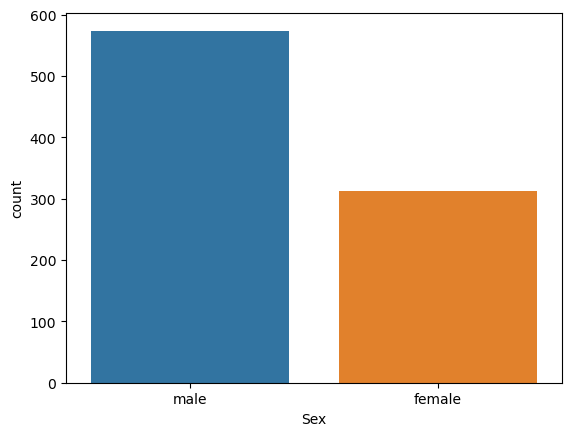

In [31]:
sns.countplot(x=df['Sex'], data=df)
plt.show()

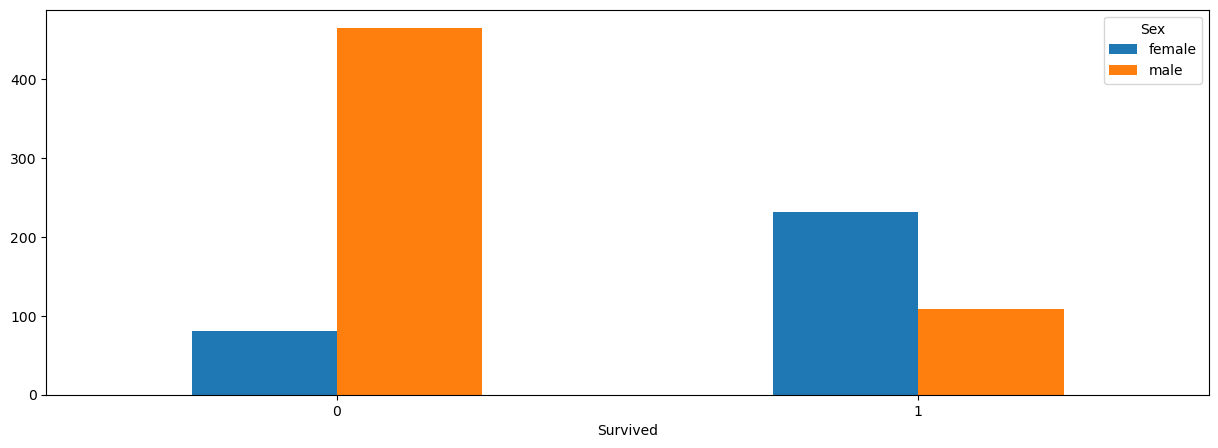

In [30]:
pd.crosstab(df['Survived'],df['Sex']).plot(kind='bar',figsize=(15,5));
plt.xticks(rotation='horizontal')
plt.show()

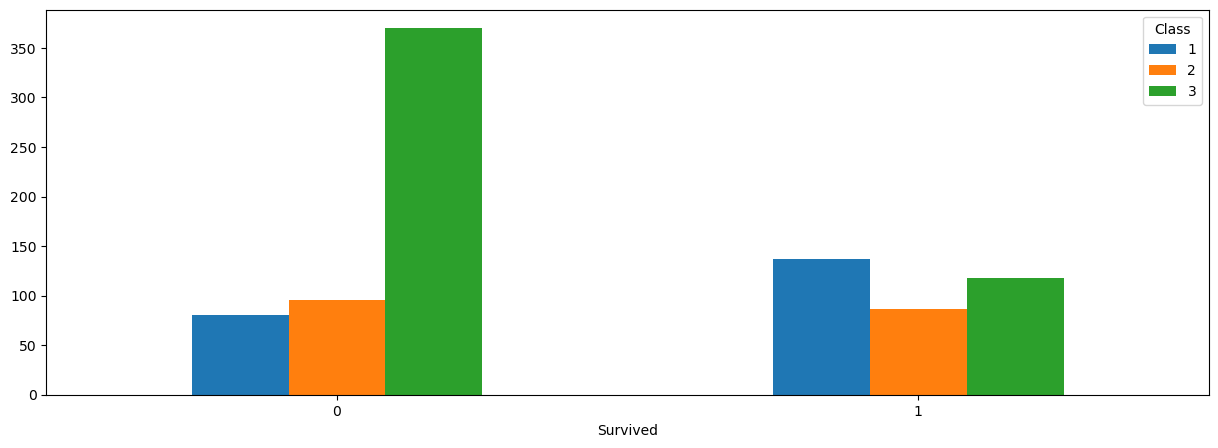

In [29]:
pd.crosstab(df['Survived'],df['Class']).plot(kind='bar',figsize=(15,5));
plt.xticks(rotation='horizontal')
plt.show()

In [19]:
df.columns

Index(['Name', 'Survived', 'Class', 'Sex', 'Age'], dtype='object')

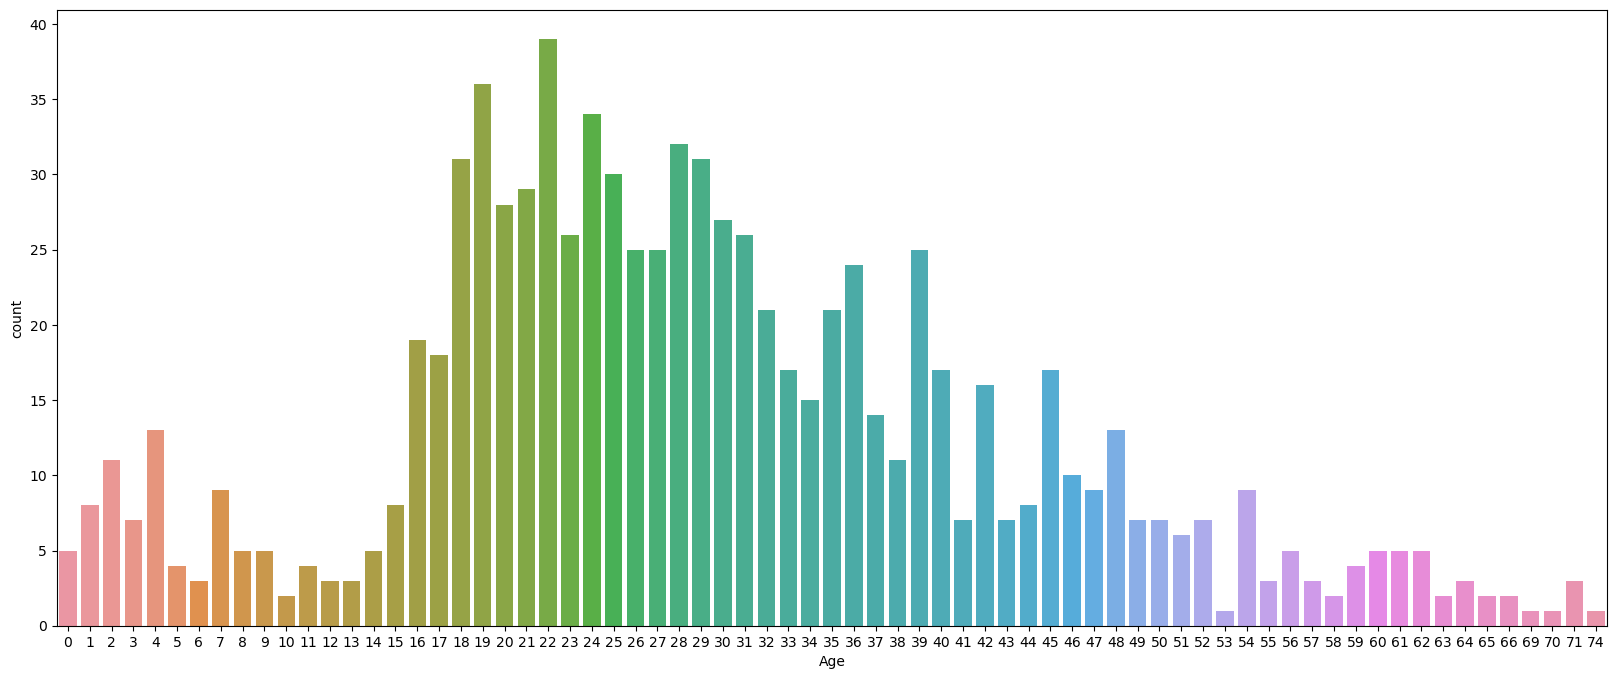

In [28]:
plt.figure(figsize=(20,8))

sns.countplot(x=df['Age'], data=df)
plt.show()

In [21]:
df.columns

Index(['Name', 'Survived', 'Class', 'Sex', 'Age'], dtype='object')

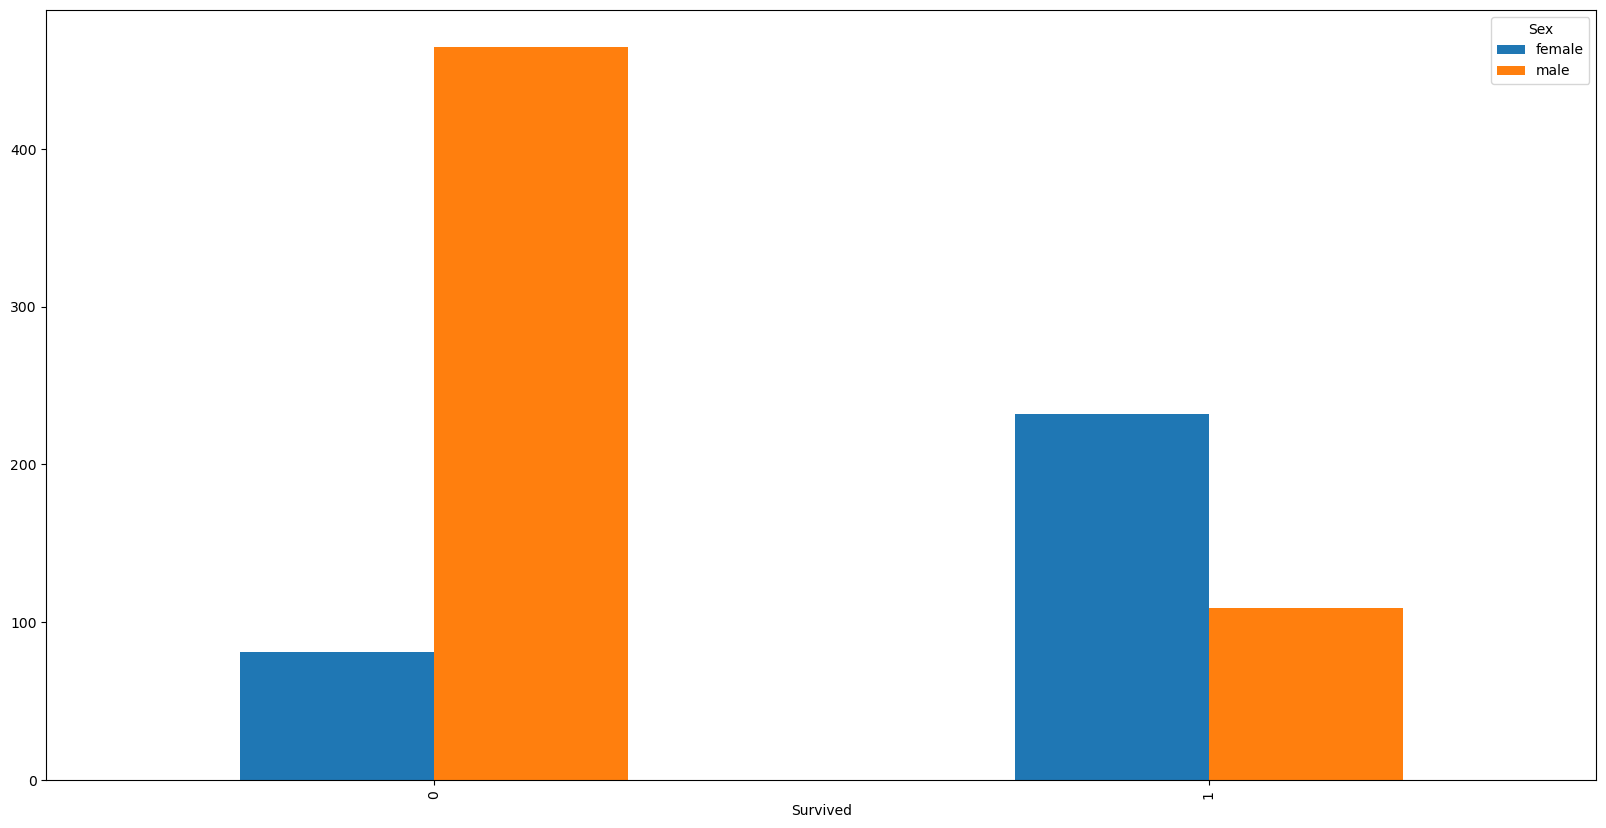

In [24]:
pd.crosstab(df['Survived'], df['Sex']).plot(kind='bar', figsize=(20, 10))
plt.show()

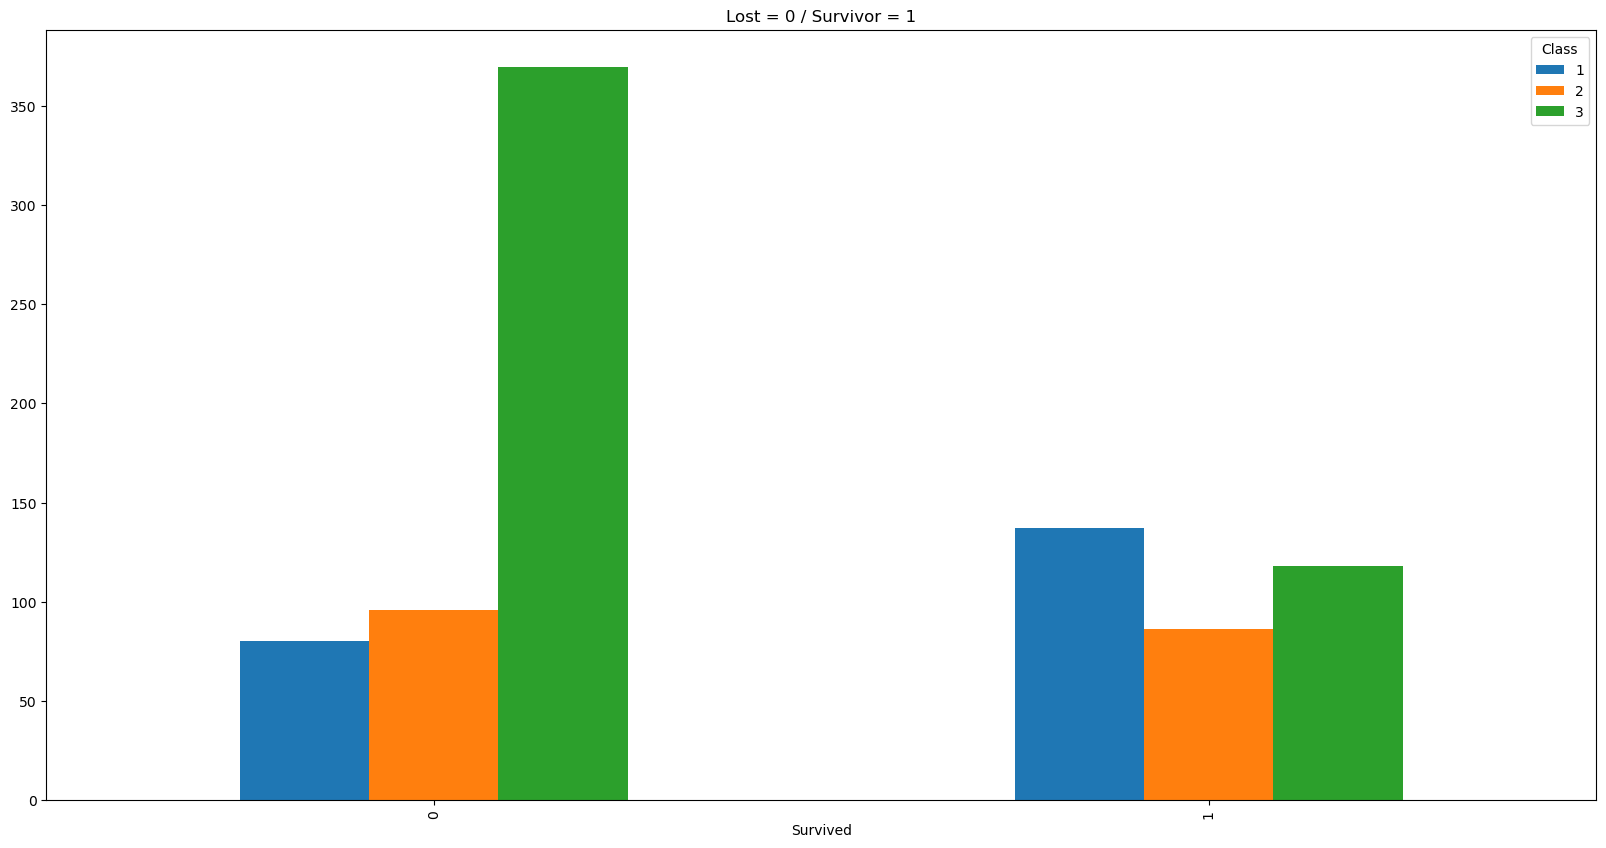

In [26]:
pd.crosstab(df['Survived'], df['Class']).plot(kind='bar', figsize=(20, 10), title='Lost = 0 / Survivor = 1')
plt.show()

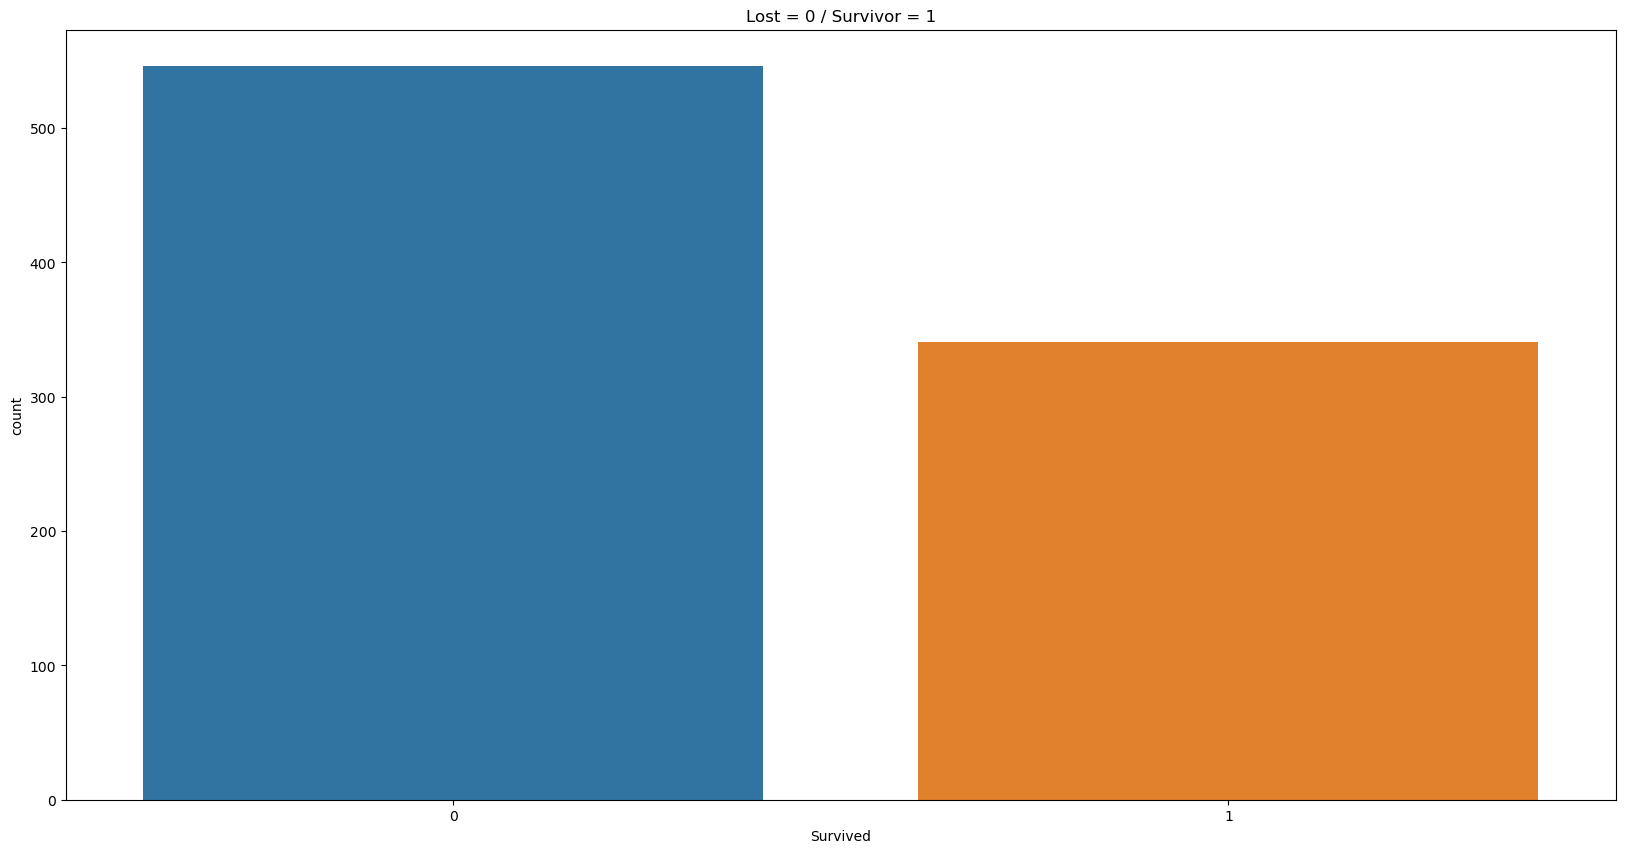

In [34]:
plt.figure(figsize=(20, 10))
plt.title(label='Lost = 0 / Survivor = 1')
sns.countplot(x=df['Survived'], data=df)
plt.show()

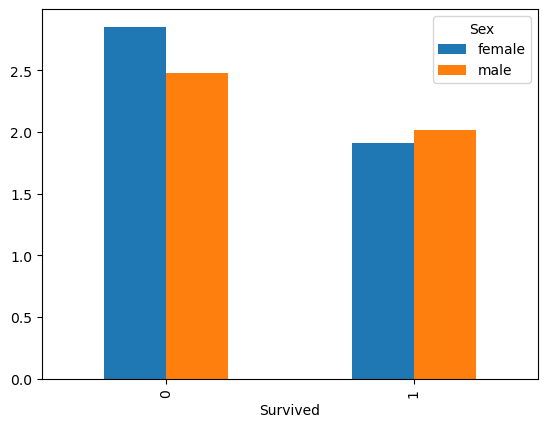

In [35]:
pd.pivot_table(df, index='Survived', columns='Sex', values='Class').plot(kind='bar')
plt.show()

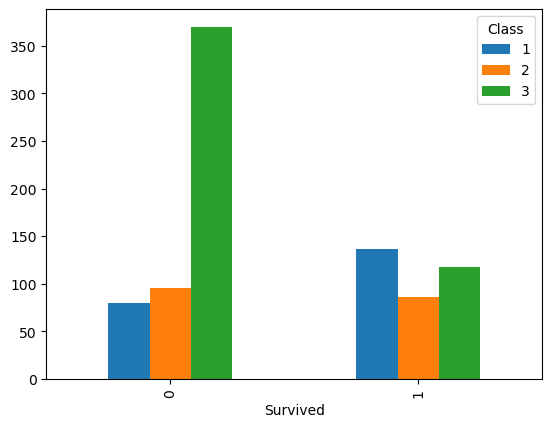

In [38]:
pd.crosstab(df['Survived'], df['Class']).plot(kind='bar')
plt.show()

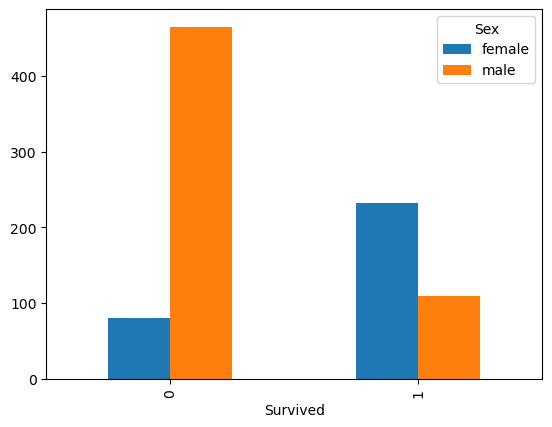

In [39]:
pd.crosstab(df['Survived'], df['Sex']).plot(kind='bar')
plt.show()

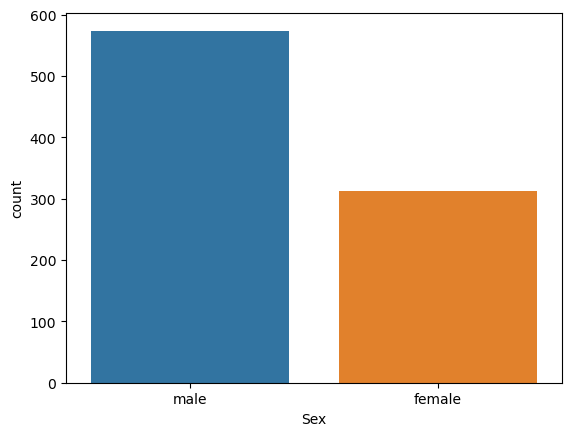

In [40]:
sns.countplot(x=df['Sex'], data=df)
plt.show()

In [41]:
women = df.loc[df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7412140575079872


In [42]:
df['Women'] = df.loc[df.Sex == 'female']['Survived']
rate = sum(women)/len(women)
print('Percent of Women Who Survived:', rate)

Percent of Women Who Survived: 0.7412140575079872


In [47]:
men = df.loc[df.Sex == 'female']["Survived"]
rate_men = sum(men)/len(men)

print("% of women who survived:", rate_men)

% of women who survived: 0.7412140575079872


In [48]:
df['Men'] = df.loc[df.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)
print('Percent of Men Who Survived:', rate_men)

Percent of Men Who Survived: 0.7412140575079872


In [ ]:
df['rate_men'] = df.loc[df.Sex == 'male']['Survived']

In [ ]:
df.drop(['rate_men'], axis=1, inplace=True)

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
pd.crosstab(df['Women'], df['Men']).plot(kind='bar')

In [ ]:
df.head()